# Word Embeddings

### Libraries

In [13]:
# import libraries

import nltk
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from sklearn.manifold import TSNE

### Datasets

In [2]:
# load review sentiment data

review_df = pd.read_csv('review_sentiment.csv')

review_df

,review_id,text,positive,neutral,negative
0,NvusujU9_5pIUbn9SZ6hMA,Stopped by to munch a burger during today's Se...,1,0,0
1,vHOeBa7aMA_na4rfS2Db5A,"Yelp doesn't allow to leave 0 star review, so ...",0,0,1
2,hG9RTxxivb0ZXzEk4JXTXA,I find it hard to believe there are so many pe...,0,0,1
3,zIVkwgahZjOneChZFUYY4g,Love this place! Almost all of their menu item...,1,0,0
4,DLczAuvMAlAnY5EeDGhTVg,Excellent customer service. I wish I could ren...,1,0,0
...,...,...,...,...,...
63446,OgoBp7fbXnLSKvsQb4O_tw,"I really loved the food and service. I mean, t...",1,0,0
63447,Q7e8EtZMmdknDrQE7huMoQ,Their Grove location was the bomb. Delicious f...,1,0,0
63448,zzMW6zbsFaQMjoGu2bGVdA,A nice ean BBQ joint right across from some ne...,1,0,0
63449,scgoa60EvhW2Mz7JMqLYGw,The perfect Hookah bar. I'm not sure what they...,1,0,0


In [3]:
# load corpus data

corpus = open('corpus.txt', 'r').read()
corpus = corpus.split('\n')
corpus = corpus[:-1]

In [4]:
# see contents of corpus

for review in corpus[:5]:
    print('-' * 50)
    print(review)

--------------------------------------------------
stop munch burger today seahawk saint game place unsurprisingli pack good reason burger order fantast sat right next door get chanc get six feet place soon got meal place start get busier busier work way world shortest peopl maze get guess mean first person hear place go back might go say lunch tuesday less busi
--------------------------------------------------
yelp allow leav star review see one star wife move ny south california contact differ move compani sent initi email unit van line soon got email back virtual survey confirm ladi virtual survey meticul profession screen whole apart minut one contact sent second email almost month ask everyth ok get quot need mention compani sent quot less hour sinc one repli til today call direct phone left messag answer machin one call back hope everyth ok one hurt see reason explan avoid unprofession
--------------------------------------------------
find hard believ mani peopl low standard co

### Dense embeddings

In [5]:
# documents representing reviews

documents = [review.split() for review in corpus]

len(documents)

63451

In [6]:
# see contents of documents

print(documents[0])

['stop', 'munch', 'burger', 'today', 'seahawk', 'saint', 'game', 'place', 'unsurprisingli', 'pack', 'good', 'reason', 'burger', 'order', 'fantast', 'sat', 'right', 'next', 'door', 'get', 'chanc', 'get', 'six', 'feet', 'place', 'soon', 'got', 'meal', 'place', 'start', 'get', 'busier', 'busier', 'work', 'way', 'world', 'shortest', 'peopl', 'maze', 'get', 'guess', 'mean', 'first', 'person', 'hear', 'place', 'go', 'back', 'might', 'go', 'say', 'lunch', 'tuesday', 'less', 'busi']


In [14]:
# model training

model = Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)

In [15]:
# embeddings

model.wv.get_vector("good")

array([-0.02398962,  0.16428769, -0.04292282, -0.17703223, -0.01760761,
        0.07633874,  0.19249663,  0.07279022,  0.04638823, -0.07966894,
        0.08244047,  0.15577704,  0.02166222, -0.0247838 ,  0.1924968 ,
        0.07290277,  0.44414446, -0.09802037,  0.12286172,  0.12511371,
        0.01665127, -0.23414595,  0.08999611, -0.12307772, -0.04362679,
        0.29697758, -0.24936968, -0.20605028,  0.09313636,  0.01549146,
        0.22761455, -0.12940863,  0.00586509, -0.02106582,  0.03867071,
       -0.0437141 ,  0.29579958, -0.1213325 ,  0.02163219, -0.06486405,
        0.07917465, -0.06938233, -0.0303752 , -0.18342717,  0.24955574,
        0.12772155,  0.03496166,  0.3550115 ,  0.25817746,  0.08675402,
        0.12412859,  0.14118123, -0.05097314, -0.1848131 ,  0.07474878,
       -0.06848226,  0.01630723,  0.20737278, -0.08296263, -0.06329149,
        0.00263966, -0.2291804 , -0.09333766, -0.15002565, -0.21447861,
       -0.07077616, -0.3587142 , -0.14585501, -0.21404488, -0.26

In [16]:
# similarity

model.wv.most_similar(positive="good")

[('great', 0.777472198009491),
 ('tasti', 0.7691114544868469),
 ('veriti', 0.754073977470398),
 ('definetli', 0.7483166456222534),
 ('decent', 0.7445887327194214),
 ('kenrick', 0.7410946488380432),
 ('bleh', 0.7363658547401428),
 ('ok', 0.7344914078712463),
 ('tomalito', 0.7341806292533875),
 ('choux', 0.7327649593353271)]

In [17]:
# similarity

model.wv.most_similar(positive="bad")

[('terribl', 0.718938946723938),
 ('horribl', 0.6666356921195984),
 ('aw', 0.6640071868896484),
 ('crucial', 0.6578510403633118),
 ('bleh', 0.656588613986969),
 ('displeas', 0.6509237289428711),
 ('outlier', 0.6497746109962463),
 ('chabli', 0.6486014127731323),
 ('alys', 0.6461875438690186),
 ('descriptor', 0.6452437043190002)]

In [18]:
# save full model (including trainable vectors to resume training)

model.save("reviews_model")

In [19]:
# save model word vectors

model.wv.save("reviews_wv")

### Vector visualization

In [20]:
def reduce_dimensions(model, num_dimensions=2, words=[]):
    '''
    Reduce the dimensions of the word vectors using t-SNE for plotting
    '''
    vectors = []
    labels = []
    if (words == []):
        words = model.wv.index_to_key
    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=2.0)
    vectors = tsne.fit_transform(vectors)
    return vectors, labels

In [21]:
def plot_word_vectors(x_vals, y_vals, labels, words=[]):
    '''
    Plot the reduced dimensions of the word vectors using matplotlib
    '''
    random.seed(0)
    x_vals_new = np.array([])
    y_vals_new = np.array([])
    labels_new = np.array([])
    if(words == []):
        x_vals_new = x_vals
        y_vals_new = y_vals
        labels_new = labels
    else:
        for i in range(len(labels)):
            if(labels[i] in words):
                x_vals_new = np.append(x_vals_new,x_vals[i])
                y_vals_new = np.append(y_vals_new,y_vals[i])
                labels_new = np.append(labels_new,labels[i])
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals_new, y_vals_new)
    for i in range(len(labels_new)):
        plt.annotate(labels_new[i], (x_vals_new[i], y_vals_new[i]))
    plt.show()

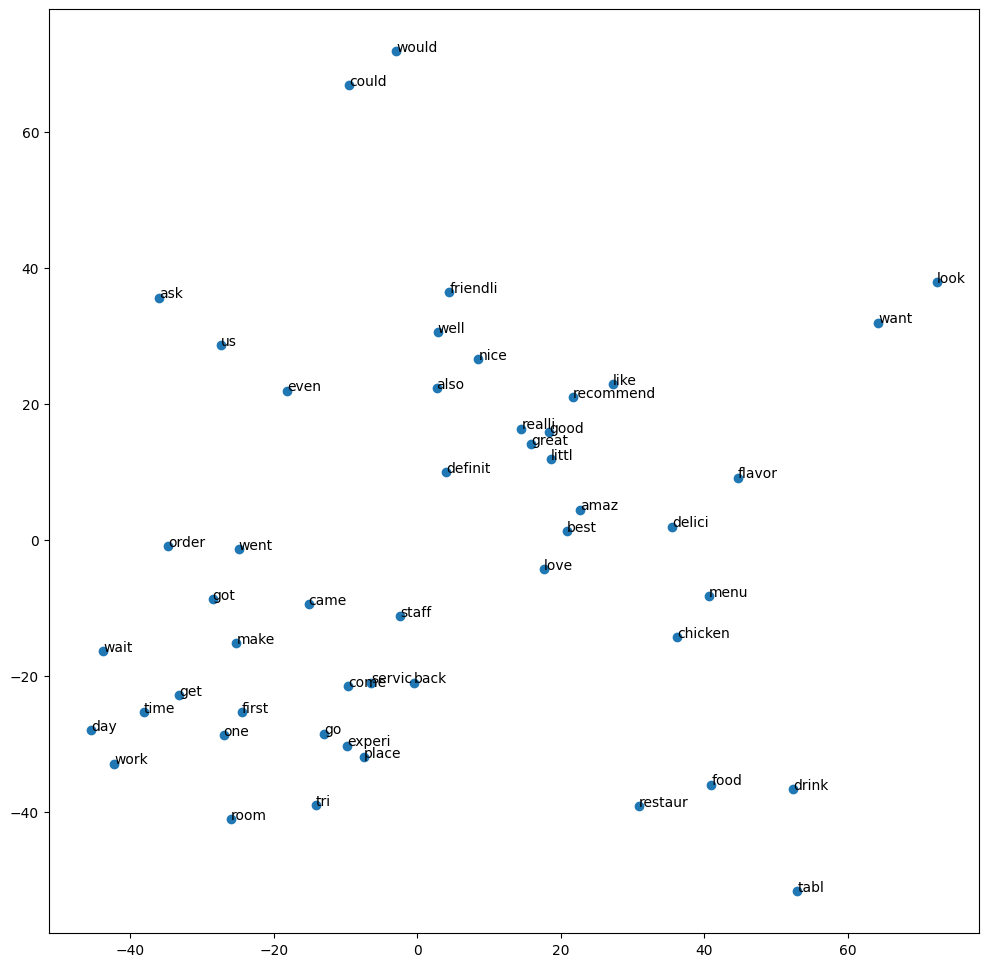

In [27]:
# visualize word vectors

all_words = ' '.join(corpus).split()
fd = nltk.FreqDist(all_words)
words = [word[0] for word in fd.most_common(50)]

vectors, labels = reduce_dimensions(model, 3, words)
x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plot_word_vectors(x_vals, y_vals, labels, words)